## We are going to use pyMC to perform some simple MCMC sampling and conclude some things from the posterior

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

### Here we generate a "mock" dataset. In real life - we will not have this step. The data will come from a measurement.

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

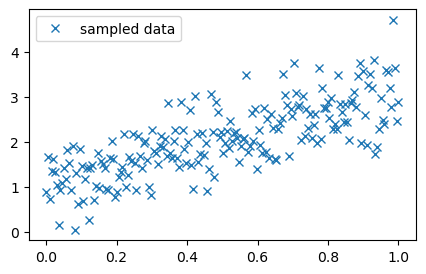

In [7]:
plt.figure(figsize=[5,3])
plt.plot(x, y, "x", label="sampled data")
#plt.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

### Remind yourself that we don't know, actually, we cannot ever know the orange line. We are looking for the most probably orange line given the scattered points around. 

In [8]:
import pymc as pm

from pymc import HalfCauchy, Model, Normal, sample, Uniform

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.25.1


In [24]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define parameters and priors
    sigma = 0.1
    intercept = Uniform("Intercept", lower=-5, upper =5)
    slope = Uniform("slope", lower=-5, upper =5)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.


In [10]:
import arviz as az

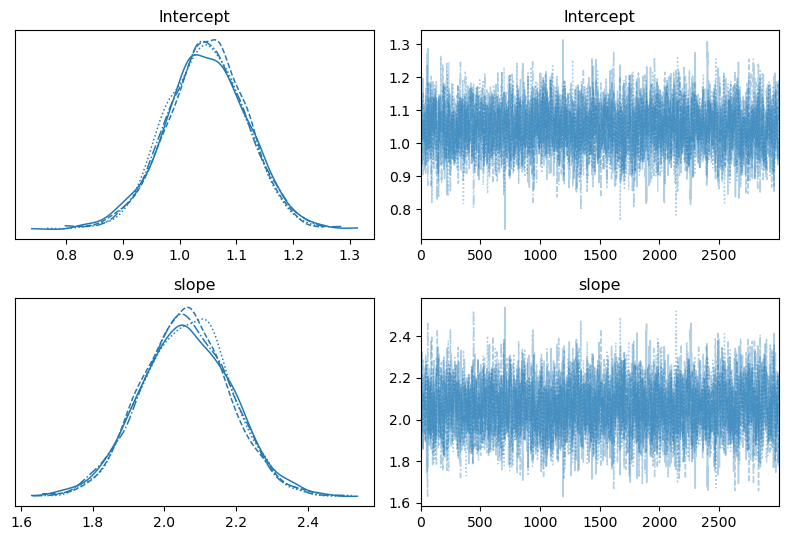

In [11]:
az.plot_trace(idata, figsize=(8, 5.5));
plt.tight_layout()

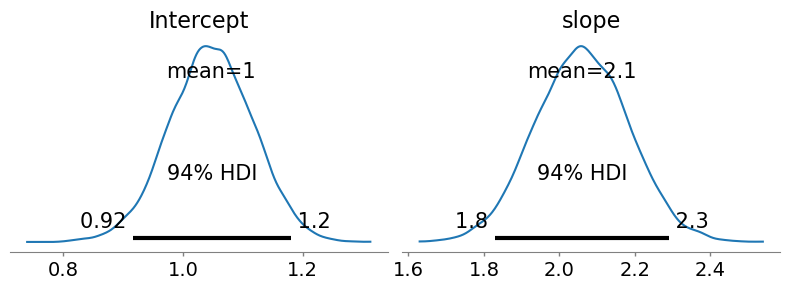

In [12]:
az.plot_posterior(idata, figsize=(8, 3));
plt.tight_layout()

In [13]:
import corner

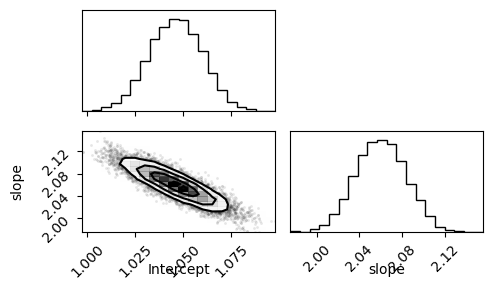

In [25]:
fig = plt.figure(figsize=[5,3])
_ = corner.corner(idata, fig=fig)
plt.tight_layout()

### What happens when I decrease the noise, I gave to my model? Go ahead and try it out. 
.

.

.

.

.

.

.

.

.


## We can also *infer the noise* . Let's see how would that work: 

In [26]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    intercept = Uniform("Intercept", lower=-5, upper =5)
    slope = Uniform("slope", lower=-5, upper =5)
    sigma = Uniform("sigma", lower=0, upper = 5)
    

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slope, sigma]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 5 seconds.


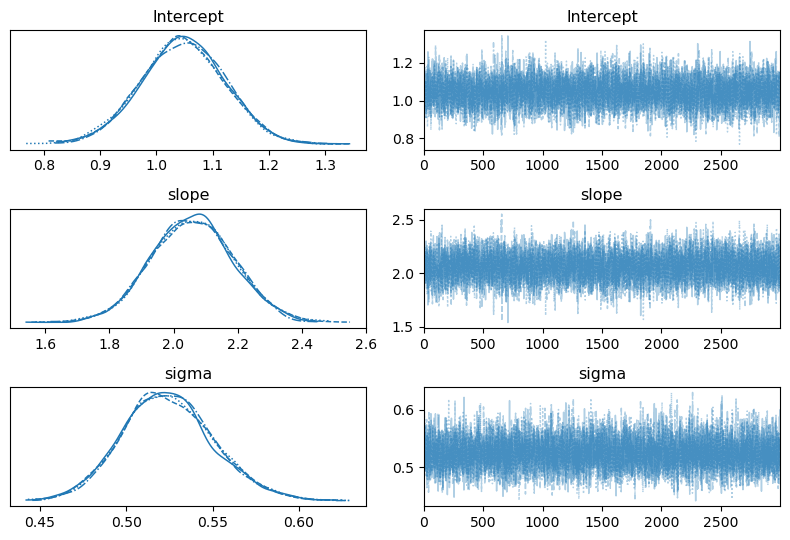

In [27]:
az.plot_trace(idata, figsize=(8, 5.5));
plt.tight_layout()

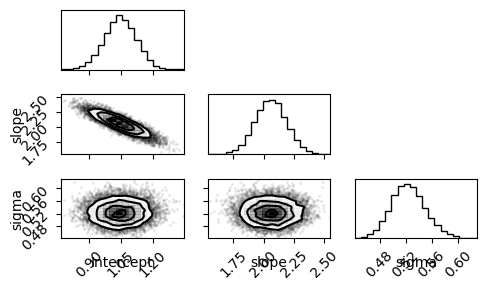

In [29]:
fig = plt.figure(figsize=[5,3])
_ = corner.corner(idata, fig=fig)
fig.tight_layout()

## Now - priors! 
### Let's spend some time discussing what would make sense for priors: 

In [30]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)
    

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 5 seconds.


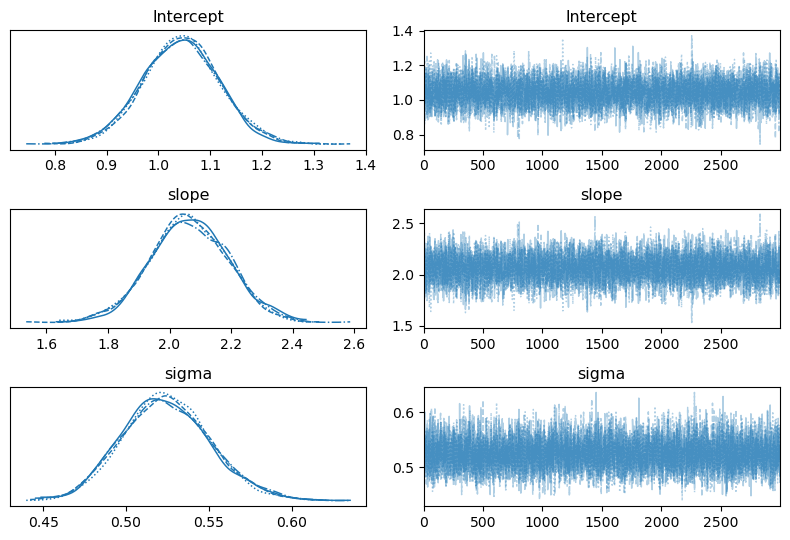

In [31]:
az.plot_trace(idata, figsize=(8, 5.5));
plt.tight_layout()

## Same result, why?

In [37]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0.2, sigma=0.05)
    slope = Normal("slope", 2.7, sigma=0.05)
    

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 5 seconds.


In [35]:
#az.plot_trace(idata, figsize=(8, 5.5));
#plt.tight_layout()

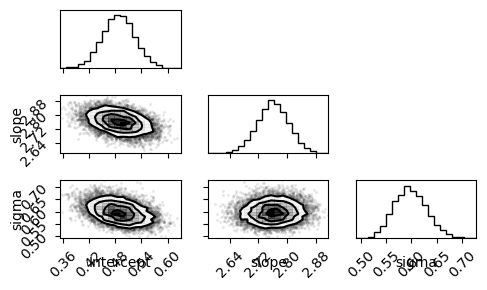

In [38]:
fig = plt.figure(figsize=[5,3])
_ = corner.corner(idata, fig=fig)
plt.tight_layout()

In [39]:
size = 2000
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

In [40]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0.2, sigma=0.05)
    slope = Normal("slope", 2.7, sigma=0.05)
    

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]
/home/milic/miniconda3/envs/psiml/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Output()

/home/milic/miniconda3/envs/psiml/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 3 seconds.


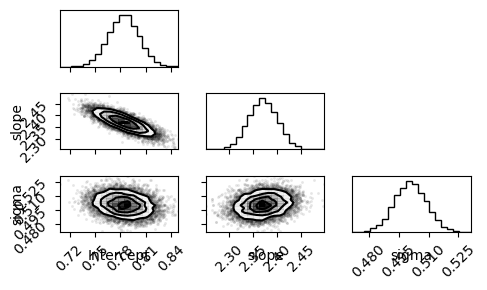

In [41]:
fig = plt.figure(figsize=[5,3])
_ = corner.corner(idata, fig=fig)
plt.tight_layout()